# Time performance for simulting NORB pooling on a single variant
Time-benchmark study over the different methods for pooling (decoding step varies):
* look up table as dictionary vs. dot-products of arrays
* block-wise decoding with a for-loop vs. block-wise in NumPy style vs. population-wide in NumPy style.
This means for example using `np.apply_along_axis(func)` for replacing a `for`-loop with func
* decoding into GP or GT

Use random arrays for simulating genotypes.

Number of blocks varies (hence population size too)

In [5]:
times = [('decoding_method', 'lookup_kind', 'genotype_format', 'nb_blocks', 'block_pop', 'nb_runs', 'loop_rep_per_run', 'mean_time_per_loop_sec', 'std_time_per_loop_sec'),
         
         ('for-loop', 'none', 'gt', 1, 'block-wise', 7, 1000, 360e-06, 55.4e-06),
         ('for-loop', 'none', 'gt', 1, 'block-wise', 7, 1000, 311e-06, 41e-06),
         ('np-apply', 'none', 'gt', 1, 'block-wise', 7, 1000, 412e-06, 26.9e-06),
         ('np-apply', 'none', 'gt', 1, 'pop-wide', 7, 1000, 123e-06, 8.72e-06),
         
         ('for-loop', 'dict', 'gp', 1, 'block-wise', 7, 1000, 390e-06, 20.7e-06),
         ('for-loop', 'dot-arrays', 'gp', 1, 'block-wise', 7, 1000, 930e-06, 17.6e-06),
         ('np-apply', 'dot-arrays', 'gp', 1, 'block-wise', 7, 1000, 977e-06, 26.3e-06),
         ('np-apply', 'dot-arrays', 'gp', 1, 'pop-wide', 7, 1000, 901e-06, 59.5e-06),  # equivalent to previous line with 1 block only
         ('numba-np-apply', 'dict', 'gp', 1, 'pop-wide', 7, 10, 446e-06, 45.5e-06),
         
         ('for-loop', 'none', 'gt', 12, 'block-wise', 7, 100,3.2e-03, 200e-06),
         ('for-loop', 'none', 'gt', 12, 'block-wise', 7, 100,3.54e-03, 315e-06),        
         ('np-apply', 'none', 'gt', 12, 'block-wise', 7, 100,3.93e-03, 222e-06),
         ('np-apply', 'none', 'gt', 12, 'pop-wide', 7, 100,697e-06, 60.2e-06),
         
         ('for-loop', 'dict', 'gp', 12, 'block-wise', 7, 100,3.23e-03, 407e-06),
         ('for-loop', 'dot-arrays', 'gp', 12, 'block-wise', 7, 100,11e-03, 825e-06),
         ('np-apply', 'dot-arrays', 'gp', 12, 'block-wise', 7, 100,10.9e-03, 122e-06),
         ('np-apply', 'dot-arrays', 'gp', 12, 'pop-wide', 7, 100,7.97e-03, 503e-06),
         ('numba-np-apply', 'dict', 'gp', 12, 'pop-wide', 7, 10, 3.13e-03, 809e-06),
         
         ('for-loop', 'none', 'gt', 36, 'block-wise', 7, 10,16.1e-03, 4.87e-03),
         ('for-loop', 'none', 'gt', 36, 'block-wise', 7, 10,12.5e-03, 4.25e-03),
         ('np-apply', 'none', 'gt', 36, 'block-wise', 7, 10,14.2e-03, 1.16e-03),
         ('np-apply', 'none', 'gt', 36, 'pop-wide', 7, 10,2.4e-03, 719e-06),
         
         ('for-loop', 'dict', 'gp', 36, 'block-wise', 7, 10,10.4e-03, 941e-06),
         ('for-loop', 'dot-arrays', 'gp', 36, 'block-wise', 7, 10,40e-03, 5.12e-03),
         ('np-apply', 'dot-arrays', 'gp', 36, 'block-wise', 7, 10,41.4e-03, 8.02e-03),
         ('np-apply', 'dot-arrays', 'gp', 36, 'pop-wide', 7, 10,33e-03, 4.36e-03),
         ('numba-np-apply', 'dict', 'gp', 36, 'pop-wide', 7, 10, 7.46e-03, 459e-06),
         
         ('for-loop', 'none', 'gt', 60, 'block-wise', 7, 10,21.2e-03, 4.74e-03),
         ('for-loop', 'none', 'gt', 60, 'block-wise', 7, 10,25.1e-03, 4.02e-03),
         ('np-apply', 'none', 'gt', 60, 'block-wise', 7, 10,24.6e-03, 2.75e-03),
         ('np-apply', 'none', 'gt', 60, 'pop-wide', 7, 10,4.4e-03, 984e-06),
         
         ('for-loop', 'dict', 'gp', 60, 'block-wise', 7, 10,17.8e-03, 4.77e-03),
         ('for-loop', 'dot-arrays', 'gp', 60, 'block-wise', 7, 10,60.9e-03, 7.85e-03),
         ('np-apply', 'dot-arrays', 'gp', 60, 'block-wise', 7, 10,72.7e-03, 11.1e-03),
         ('np-apply', 'dot-arrays', 'gp', 60, 'pop-wide', 7, 10,56.9e-03, 7.97e-03),
         ('numba-np-apply', 'dict', 'gp', 60, 'pop-wide', 7, 10, 13.4e-03, 120e-06),
         
         ('for-loop', 'none', 'gt', 90, 'block-wise', 7, 10,21.2e-03, 4.74e-03),
         ('for-loop', 'none', 'gt', 90, 'block-wise', 7, 10,36.1e-03, 6.03e-03),
         ('np-apply', 'none', 'gt', 90, 'block-wise', 7, 10,42.1e-03, 9.03e-03),
         ('np-apply', 'none', 'gt', 90, 'pop-wide', 7, 10,5.5e-03, 631e-06),
         
         ('for-loop', 'dict', 'gp', 90, 'block-wise', 7, 10,28.3e-03, 4.38e-03),
         ('for-loop', 'dot-arrays', 'gp', 90, 'block-wise', 7, 10,94.3e-03, 12.2e-03),
         ('np-apply', 'dot-arrays', 'gp', 90, 'block-wise', 7, 10,105e-03, 7.79e-03),
         ('np-apply', 'dot-arrays', 'gp', 90, 'pop-wide', 7, 10,82.5e-03, 11.7e-03),
         ('numba-np-apply', 'dict', 'gp', 90, 'pop-wide', 7, 10, 29.5e-03, 8.17e-03),
         
         ('for-loop', 'none', 'gt', 120, 'block-wise', 7, 10, 44.3e-03, 10.3e-03),
         ('for-loop', 'none', 'gt', 120, 'block-wise', 7, 10, 39.5e-03, 6.51e-03),
         ('np-apply', 'none', 'gt', 120, 'block-wise', 7, 10, 51.1e-03, 10.3e-03),
         ('np-apply', 'none', 'gt', 120, 'pop-wide', 7, 10,8.68e-03, 1.36e-03),
         
         ('for-loop', 'dict', 'gp', 120, 'block-wise', 7, 10,37.5e-03, 8.57e-03),
         ('for-loop', 'dot-arrays', 'gp', 120, 'block-wise', 7, 10,187e-03, 45.8e-03),
         ('np-apply', 'dot-arrays', 'gp', 120, 'block-wise', 7, 10,137e-03, 16.1e-03),
         ('np-apply', 'dot-arrays', 'gp', 120, 'pop-wide', 7, 10, 98.2e-03, 4.05e-03),
         ('numba-np-apply', 'dict', 'gp', 120, 'pop-wide', 7, 10, 45.8e-03, 2.45e-03),
         
         ('for-loop', 'none', 'gt', 180, 'block-wise', 7, 10,60.6e-03, 12.6e-03),
         ('for-loop', 'none', 'gt', 180, 'block-wise', 7, 10,66.7e-03, 15.9e-03),
         ('np-apply', 'none', 'gt', 180, 'block-wise', 7, 10,67.3e-03, 9.9e-03),
         ('np-apply', 'none', 'gt', 180, 'pop-wide', 7, 10,20.4e-03, 6.44e-03),
         
         ('for-loop', 'dict', 'gp', 180, 'block-wise', 7, 10,55.2e-03, 6.26e-03),
         ('for-loop', 'dot-arrays', 'gp', 180, 'block-wise', 7, 10,278e-03, 66.8e-03),
         ('np-apply', 'dot-arrays', 'gp', 180, 'block-wise', 7, 10,233e-03, 56e-03),
         ('np-apply', 'dot-arrays', 'gp', 180, 'pop-wide', 7, 10,238e-03, 61.1e-03),
         ('numba-np-apply', 'dict', 'gp', 180, 'pop-wide', 7, 10, 89.7e-03, 4.7e-03),
         
         ('for-loop', 'none', 'gt', 250, 'block-wise', 7, 10,82.6e-03, 16e-03),
         ('for-loop', 'none', 'gt', 250, 'block-wise', 7, 10,76.6e-03, 11.9e-03),
         ('np-apply', 'none', 'gt', 250, 'block-wise', 7, 10,92.3e-03, 15.4e-03),
         ('np-apply', 'none', 'gt', 250, 'pop-wide', 7, 10,50.3e-03, 6.36e-03),
         
         ('for-loop', 'dict', 'gp', 250, 'block-wise', 7, 10, 75.2e-03, 12.3e-03),
         ('for-loop', 'dot-arrays', 'gp', 250, 'block-wise', 7, 10, 304e-03, 53.4e-03),
         ('np-apply', 'dot-arrays', 'gp', 250, 'block-wise', 7, 10, 320e-03, 76.3e-03),
         ('np-apply', 'dot-arrays', 'gp', 250, 'pop-wide', 7, 10, 367e-03, 70.5e-03),
         ('numba-np-apply', 'dict', 'gp', 250, 'pop-wide', 7, 10, 190e-03, 11.9e-03),
         
         ('for-loop', 'none', 'gt', 450, 'block-wise', 7, 10,192e-03, 48.5e-03),
         ('for-loop', 'none', 'gt', 450, 'block-wise', 7, 10,177e-03, 37.5e-03),
         ('np-apply', 'none', 'gt', 450, 'block-wise', 7, 10,199e-03, 57e-03),
         ('np-apply', 'none', 'gt', 450, 'pop-wide', 7, 10,258e-03, 11e-03),
         
         ('for-loop', 'dict', 'gp', 450, 'block-wise', 7, 10,154e-03, 34.4e-03),
         ('for-loop', 'dot-arrays', 'gp', 450, 'block-wise', 7, 10,422e-03, 23.1e-03),
         ('np-apply', 'dot-arrays', 'gp', 450, 'block-wise', 7, 10,509e-03, 71.7e-03),
         ('np-apply', 'dot-arrays', 'gp', 450, 'pop-wide', 7, 10,880e-03, 56.8e-03),
         ('numba-np-apply', 'dict', 'gp', 450, 'pop-wide', 7, 10, 579e-03, 49.7e-03),
         
         ('for-loop', 'none', 'gt', 850, 'block-wise', 7, 1,326e-03, 81.9e-03),
         ('for-loop', 'none', 'gt', 850, 'block-wise', 7, 1,347e-03, 95.6e-03),
         ('np-apply', 'none', 'gt', 850, 'block-wise', 7, 1,326e-03, 80.3e-03),
         ('np-apply', 'none', 'gt', 850, 'pop-wide', 7, 1,810e-03, 96.7e-03),
         
         ('for-loop', 'dict', 'gp', 850, 'block-wise', 7, 1,282e-03, 66.9e-03),
         ('for-loop', 'dot-arrays', 'gp', 850, 'block-wise', 7, 1,912e-03, 96.6e-03),
         ('np-apply', 'dot-arrays', 'gp', 850, 'block-wise', 7, 1,945e-03, 122e-03),
         ('np-apply', 'dot-arrays', 'gp', 850, 'pop-wide', 7, 1,2.97, 277e-03),
         ('numba-np-apply', 'dict', 'gp', 850, 'pop-wide', 7, 10, 1.96, 156e-03),
         
         ('for-loop', 'none', 'gt', 1200, 'block-wise', 7, 1,397e-03, 131e-03),
         ('for-loop', 'none', 'gt', 1200, 'block-wise', 7, 1,486e-03, 94.7e-03),
         ('np-apply', 'none', 'gt', 1200, 'block-wise', 7, 1,544e-03, 130e-03),
         ('np-apply', 'none', 'gt', 1200, 'pop-wide', 7, 1, 1.88, 56.7e-03),
         
         ('for-loop', 'dict', 'gp', 1200, 'block-wise', 7, 1, 334e-03, 68.4e-03),
         ('for-loop', 'dot-arrays', 'gp', 1200, 'block-wise', 7, 1,1.34, 239e-03),
         ('np-apply', 'dot-arrays', 'gp', 1200, 'block-wise', 7, 1,1.25, 181e-03),
         ('np-apply', 'dot-arrays', 'gp', 1200, 'pop-wide', 7, 1, 5.44, 385e-03),
         ('numba-np-apply', 'dict', 'gp', 1200, 'pop-wide', 7, 1, 4.17, 422e-03),
         
         ('for-loop', 'none', 'gt', 2000, 'block-wise', 7, 1,631e-03, 77.9e-03),
         ('for-loop', 'none', 'gt', 2000, 'block-wise', 7, 1,710e-03, 154e-03),
         ('np-apply', 'none', 'gt', 2000, 'block-wise', 7, 1,858e-03, 194e-03),
         ('np-apply', 'none', 'gt', 2000, 'pop-wide', 7, 1, 5.07, 327e-03),
         
         ('for-loop', 'dict', 'gp', 2000, 'block-wise', 7, 1, 550e-03, 62.4e-03),
         ('for-loop', 'dot-arrays', 'gp', 2000, 'block-wise', 7, 1,2.04, 165e-03),
         ('np-apply', 'dot-arrays', 'gp', 2000, 'block-wise', 7, 1,1.82, 34e-03),
         ('np-apply', 'dot-arrays', 'gp', 2000, 'pop-wide', 7, 1, 21.3, 1.33),
         ('numba-np-apply', 'dict', 'gp', 2000, 'pop-wide', 7, 1, 18.7, 183e-03),
         ]

In [3]:
for i, tp in enumerate(times):
    break
    print('Line {} --> {} columns'.format(i, len(tp)))
    

Line 0 --> 9 columns
Line 1 --> 9 columns
Line 2 --> 9 columns
Line 3 --> 9 columns
Line 4 --> 9 columns
Line 5 --> 9 columns
Line 6 --> 9 columns
Line 7 --> 9 columns
Line 8 --> 9 columns
Line 9 --> 9 columns
Line 10 --> 9 columns
Line 11 --> 9 columns
Line 12 --> 9 columns
Line 13 --> 9 columns
Line 14 --> 9 columns
Line 15 --> 9 columns
Line 16 --> 9 columns
Line 17 --> 9 columns
Line 18 --> 9 columns
Line 19 --> 9 columns
Line 20 --> 9 columns
Line 21 --> 9 columns
Line 22 --> 9 columns
Line 23 --> 9 columns
Line 24 --> 9 columns
Line 25 --> 9 columns
Line 26 --> 9 columns
Line 27 --> 9 columns
Line 28 --> 9 columns
Line 29 --> 9 columns
Line 30 --> 9 columns
Line 31 --> 9 columns
Line 32 --> 9 columns
Line 33 --> 9 columns
Line 34 --> 9 columns
Line 35 --> 9 columns
Line 36 --> 9 columns
Line 37 --> 9 columns
Line 38 --> 9 columns
Line 39 --> 9 columns
Line 40 --> 9 columns
Line 41 --> 9 columns
Line 42 --> 9 columns
Line 43 --> 9 columns
Line 44 --> 9 columns
Line 45 --> 9 column

  decoding_method lookup_kind genotype_format  nb_blocks   block_pop  nb_runs  \
0        for-loop        none              gt          1  block-wise        7   
1        for-loop        none              gt          1  block-wise        7   
2        np-apply        none              gt          1  block-wise        7   
3        np-apply        none              gt          1    pop-wide        7   
4        for-loop        dict              gp          1  block-wise        7   

   loop_rep_per_run  mean_time_per_loop_sec  std_time_per_loop_sec  
0              1000                0.000360               0.000055  
1              1000                0.000311               0.000041  
2              1000                0.000412               0.000027  
3              1000                0.000123               0.000009  
4              1000                0.000390               0.000021  


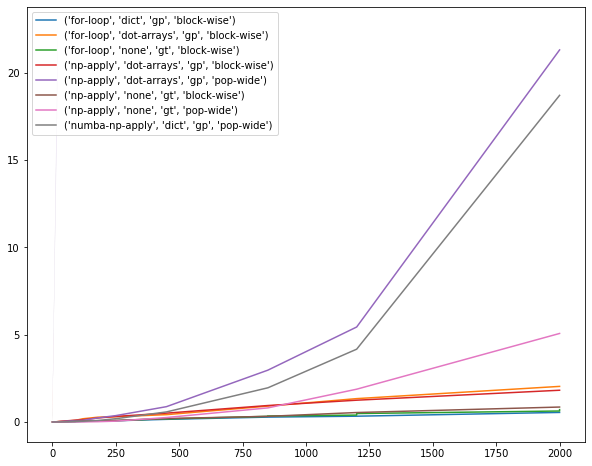

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

dftim = pd.DataFrame.from_records(times[1:], columns=times[0])
print(dftim.head())

dfgp = dftim.groupby(['decoding_method', 'lookup_kind', 'genotype_format', 'block_pop'])

fig, ax = plt.subplots(figsize=(10,8))
for key, grp in dfgp:
    min_ser = grp['mean_time_per_loop_sec'] - grp['std_time_per_loop_sec']
    max_ser = grp['mean_time_per_loop_sec'] + grp['std_time_per_loop_sec']
    ax.plot(grp['nb_blocks'], grp['mean_time_per_loop_sec'], label=key)
    ax.fill_between( grp['mean_time_per_loop_sec'], min_ser, max_ser, alpha=0.2)
#plt.xscale("log")
ax.legend()
plt.savefig('/home/camille/PoolImpHuman/pooling_timing.png')   


In [27]:
from scripts.VCFPooling.poolSNPs.pooler import Design, Encoder
from scripts.VCFPooling.poolSNPs.pydecoder import *
import timeit
from numba import jit, njit
from numba.core import types
from numba.typed import Dict

%load_ext snakeviz


np.random.seed(123)
path_keys = '/home/camille/PoolImpHuman/data/main'

nb_blocks = 2000
var = np.random.binomial(1, 0.85, (16*nb_blocks, 2))

print('Input genotypes:')
print(var.shape)
if nb_blocks < 5 or nb_blocks > 80:
    print(var)

# %prun -D heat_main.cprun 'heat_main.py'
# %sx snakeviz 'heat_main.cprun' ## opens profile in web browser

The snakeviz extension is already loaded. To reload it, use:
  %reload_ext snakeviz
Input genotypes:
(32000, 2)
[[1 1]
 [1 1]
 [1 1]
 ...
 [0 1]
 [1 1]
 [1 1]]


In [28]:
## Encoding
dse = Design(blocks=nb_blocks)
dme = dse.matrix
enc = Encoder(dme)
varp = enc.encode(var.sum(axis=-1))

print('Pools genotypes (encoded):')
print(varp.shape)
if nb_blocks < 5 or nb_blocks > 80:
    print(varp)

Pools genotypes (encoded):
(1, 16000, 2)
[[[1 0]
  [1 1]
  [1 1]
  ...
  [1 0]
  [1 0]
  [1 0]]]


In [4]:
lookup = load_lookup_dict(path_keys)
keys, vals = get_lookup_arrays(path_keys)

### Decoding to GT: no lookup + block-wise + for-loop

In [7]:
dsd = Design()
dmd = dsd.matrix
dec = DictBlockDecoder(dmd, lookup)

y_shift = dmd.shape[0]  # 8

print('Decoding {} blocks...'.format(nb_blocks))

Decoding 250 blocks...


In [8]:
%%timeit
q1 = dict_blocks_decoder(nb_blocks, varp.sum(axis=-1), y_shift, lookup, 'gt')

79.6 ms ± 5.22 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [24]:
%%prun -q
q1 = dict_blocks_decoder(nb_blocks, varp.sum(axis=-1), y_shift, lookup, 'gt')

In [25]:
q1 = dict_blocks_decoder(nb_blocks, varp.sum(axis=-1), y_shift, lookup, 'gt')
print(q1.shape)
if nb_blocks < 5 or nb_blocks > 80:
    print(q1)

(120, 16, 2)
[[[ 1  1]
  [ 1  1]
  [ 1  1]
  ...
  [ 1  1]
  [ 1  1]
  [ 1  1]]

 [[ 1  1]
  [-1 -1]
  [-1 -1]
  ...
  [-1 -1]
  [-1 -1]
  [-1 -1]]

 [[ 1  1]
  [-1 -1]
  [-1 -1]
  ...
  [-1 -1]
  [-1 -1]
  [-1 -1]]

 ...

 [[-1 -1]
  [ 1  1]
  [ 1  1]
  ...
  [ 1  1]
  [ 1  1]
  [-1 -1]]

 [[-1 -1]
  [ 1  1]
  [-1 -1]
  ...
  [ 1  1]
  [-1 -1]
  [-1 -1]]

 [[ 1  1]
  [-1 -1]
  [-1 -1]
  ...
  [-1 -1]
  [-1 -1]
  [-1 -1]]]


### Decoding to GT: no lookup + block-wise + for-loop

In [26]:
dsd = Design()
dmd = dsd.matrix
dec = SingleBlockDecoder(dmd, keys, vals)

y_shift = dmd.shape[0]  # 8

print('Decoding {} blocks...'.format(nb_blocks))

Decoding 120 blocks...


In [27]:
%%timeit
q2 = blocks_decoder(nb_blocks, varp.sum(axis=-1), y_shift, keys, vals, 'gt')

34.1 ms ± 3.24 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [28]:
q2 = blocks_decoder(nb_blocks, varp.sum(axis=-1), y_shift, keys, vals, 'gt')
print(q2.shape)
if nb_blocks < 5 or nb_blocks > 80:
    print(q2)

(120, 16, 2)
[[[ 1  1]
  [ 1  1]
  [ 1  1]
  ...
  [ 1  1]
  [ 1  1]
  [ 1  1]]

 [[ 1  1]
  [-1 -1]
  [-1 -1]
  ...
  [-1 -1]
  [-1 -1]
  [-1 -1]]

 [[ 1  1]
  [-1 -1]
  [-1 -1]
  ...
  [-1 -1]
  [-1 -1]
  [-1 -1]]

 ...

 [[-1 -1]
  [ 1  1]
  [ 1  1]
  ...
  [ 1  1]
  [ 1  1]
  [-1 -1]]

 [[-1 -1]
  [ 1  1]
  [-1 -1]
  ...
  [ 1  1]
  [-1 -1]
  [-1 -1]]

 [[ 1  1]
  [-1 -1]
  [-1 -1]
  ...
  [-1 -1]
  [-1 -1]
  [-1 -1]]]


### Decoding to GT: noe lookup + block-wise + NumPy style

In [29]:
dsd = Design()
dmd = dsd.matrix
dec = SingleBlockDecoder(dmd, keys, vals)

y_shift = dmd.shape[0]  # 8
vect_decoder = lambda x: single_block_decoder(x, keys, vals, 'gt')
v2 = varp.sum(axis=-1).reshape((nb_blocks, 8))
print('Decoding {} blocks...'.format(nb_blocks))

Decoding 120 blocks...


In [30]:
%%timeit
q3 = np.apply_along_axis(vect_decoder, axis=-1, arr=v2)

39.2 ms ± 523 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [31]:
q3 = np.apply_along_axis(vect_decoder, axis=-1, arr=v2)
print(q3.shape)
if nb_blocks < 5 or nb_blocks > 80:
    print(q3)

(120, 1, 16, 2)
[[[[ 1  1]
   [ 1  1]
   [ 1  1]
   ...
   [ 1  1]
   [ 1  1]
   [ 1  1]]]


 [[[ 1  1]
   [-1 -1]
   [-1 -1]
   ...
   [-1 -1]
   [-1 -1]
   [-1 -1]]]


 [[[ 1  1]
   [-1 -1]
   [-1 -1]
   ...
   [-1 -1]
   [-1 -1]
   [-1 -1]]]


 ...


 [[[-1 -1]
   [ 1  1]
   [ 1  1]
   ...
   [ 1  1]
   [ 1  1]
   [-1 -1]]]


 [[[-1 -1]
   [ 1  1]
   [-1 -1]
   ...
   [ 1  1]
   [-1 -1]
   [-1 -1]]]


 [[[ 1  1]
   [-1 -1]
   [-1 -1]
   ...
   [-1 -1]
   [-1 -1]
   [-1 -1]]]]


### Decoding to GT: no lookup + population-wide + NumPy style

In [32]:
dsd = Design(blocks=nb_blocks)
dmd = dsd.matrix
# dec = Decoder(dmd, keys, vals)
# dict trial
dec = Decoder(dmd, lookup)

print('Decoding {} blocks...'.format(nb_blocks))

Decoding 120 blocks...


In [33]:
%%timeit
q4 = dec.decode_genotypes_gt(varp.sum(axis=-1))

7.99 ms ± 635 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [34]:
q4 = dec.decode_genotypes_gt(varp.sum(axis=-1))
print(q4.shape)
if nb_blocks < 5 or nb_blocks > 80:
    print(q4)

(1920, 2)
[[ 1  1]
 [ 1  1]
 [ 1  1]
 ...
 [-1 -1]
 [-1 -1]
 [-1 -1]]


In [35]:
print('Outputs identity test')
print('q1 = q2 = q3 = q4 ? --> ', q1.all() == q2.all() and q2.all() == q3.all() and q3.all() == q4.all())

Outputs identity test
q1 = q2 = q3 = q4 ? -->  True


### Decoding to GP: dictionary lookup + block-wise + for-loop

In [29]:
dsd = Design()
dmd = dsd.matrix
dec = DictBlockDecoder(dmd, lookup)

y_shift = dmd.shape[0]  # 8

print('Decoding {} blocks...'.format(nb_blocks))

Decoding 2000 blocks...


In [30]:
%%timeit
q5 = dict_blocks_decoder(nb_blocks, varp.sum(axis=-1), y_shift, lookup, 'gp')

661 ms ± 20.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [38]:
%%prun -s cumulative -s time -D q5.cprun -q
q5 = dict_blocks_decoder(nb_blocks, varp.sum(axis=-1), y_shift, lookup, 'gp')

 
*** Profile stats marshalled to file 'q5.cprun'. 


In [39]:
%sx snakeviz 'q5.cprun'

^C


[]

In [40]:
q5 = dict_blocks_decoder(nb_blocks, varp.sum(axis=-1), y_shift, lookup, 'gp')
print(q5.shape)
if nb_blocks < 5 or nb_blocks > 80:
    print(q5)

(120, 16, 3)
[[[0.       0.       1.      ]
  [0.       0.       1.      ]
  [0.       0.       1.      ]
  ...
  [0.       0.       1.      ]
  [0.       0.       1.      ]
  [0.       0.       1.      ]]

 [[0.       0.       1.      ]
  [0.35508  0.35508  0.28984 ]
  [0.35508  0.35508  0.28984 ]
  ...
  [0.35508  0.35508  0.28984 ]
  [0.35508  0.35508  0.28984 ]
  [0.35508  0.35508  0.28984 ]]

 [[0.       0.       1.      ]
  [0.35508  0.35508  0.28984 ]
  [0.35508  0.35508  0.28984 ]
  ...
  [0.35508  0.35508  0.28984 ]
  [0.35508  0.35508  0.28984 ]
  [0.35508  0.35508  0.28984 ]]

 ...

 [[0.384287 0.384287 0.231426]
  [0.       0.       1.      ]
  [0.       0.       1.      ]
  ...
  [0.       0.       1.      ]
  [0.       0.       1.      ]
  [0.384287 0.384287 0.231426]]

 [[0.35508  0.35508  0.28984 ]
  [0.       0.       1.      ]
  [0.35508  0.35508  0.28984 ]
  ...
  [0.       0.       1.      ]
  [0.35508  0.35508  0.28984 ]
  [0.35508  0.35508  0.28984 ]]

 [[0.      

### Decoding to GP: array-like lookup + block-wise + for-loop

In [41]:
dsd = Design()
dmd = dsd.matrix
dec = SingleBlockDecoder(dmd, keys, vals)

y_shift = dmd.shape[0]  # 8

print('Decoding {} blocks...'.format(nb_blocks))

Decoding 120 blocks...


In [42]:
%%timeit
q6 = blocks_decoder(nb_blocks, varp.sum(axis=-1), y_shift, keys, vals, 'gp')

70.8 ms ± 5.62 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [43]:
%%prun -s cumulative -s time -D q6.cprun -q
q6 = blocks_decoder(nb_blocks, varp.sum(axis=-1), y_shift, keys, vals, 'gp')

 
*** Profile stats marshalled to file 'q6.cprun'. 


In [44]:
%sx snakeviz 'q6.cprun'

^C


[]

In [45]:
q6 = blocks_decoder(nb_blocks, varp.sum(axis=-1), y_shift, keys, vals, 'gp')
print(q6.shape)
if nb_blocks < 5 or nb_blocks > 80:
    print(q6)

(120, 16, 3)
[[[0.       0.       1.      ]
  [0.       0.       1.      ]
  [0.       0.       1.      ]
  ...
  [0.       0.       1.      ]
  [0.       0.       1.      ]
  [0.       0.       1.      ]]

 [[0.       0.       1.      ]
  [0.35508  0.35508  0.28984 ]
  [0.35508  0.35508  0.28984 ]
  ...
  [0.35508  0.35508  0.28984 ]
  [0.35508  0.35508  0.28984 ]
  [0.35508  0.35508  0.28984 ]]

 [[0.       0.       1.      ]
  [0.35508  0.35508  0.28984 ]
  [0.35508  0.35508  0.28984 ]
  ...
  [0.35508  0.35508  0.28984 ]
  [0.35508  0.35508  0.28984 ]
  [0.35508  0.35508  0.28984 ]]

 ...

 [[0.384287 0.384287 0.231426]
  [0.       0.       1.      ]
  [0.       0.       1.      ]
  ...
  [0.       0.       1.      ]
  [0.       0.       1.      ]
  [0.384287 0.384287 0.231426]]

 [[0.35508  0.35508  0.28984 ]
  [0.       0.       1.      ]
  [0.35508  0.35508  0.28984 ]
  ...
  [0.       0.       1.      ]
  [0.35508  0.35508  0.28984 ]
  [0.35508  0.35508  0.28984 ]]

 [[0.      

### Decoding to GP: array-like lookup + block-wise + NumPy style

In [46]:
dsd = Design()
dmd = dsd.matrix
dec = SingleBlockDecoder(dmd, keys, vals)

y_shift = dmd.shape[0]  # 8
vect_decoder = lambda x: single_block_decoder(x, keys, vals, 'gp')
v2 = varp.sum(axis=-1).reshape((nb_blocks, 8))
print('Decoding {} blocks...'.format(nb_blocks))

Decoding 120 blocks...


In [47]:
%%timeit
q7 = np.apply_along_axis(vect_decoder, axis=-1, arr=v2)

79.4 ms ± 6.44 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [48]:
%%prun -s cumulative -s time -D q7.cprun -q
q7 = np.apply_along_axis(vect_decoder, axis=-1, arr=v2)

 
*** Profile stats marshalled to file 'q7.cprun'. 


In [49]:
%sx snakeviz 'q7.cprun'

^C


[]

In [50]:
q7 = np.apply_along_axis(vect_decoder, axis=-1, arr=v2)
print(q7.shape)
if nb_blocks < 5 or nb_blocks > 80:
    print(q7)
    

(120, 16, 3)
[[[0.       0.       1.      ]
  [0.       0.       1.      ]
  [0.       0.       1.      ]
  ...
  [0.       0.       1.      ]
  [0.       0.       1.      ]
  [0.       0.       1.      ]]

 [[0.       0.       1.      ]
  [0.35508  0.35508  0.28984 ]
  [0.35508  0.35508  0.28984 ]
  ...
  [0.35508  0.35508  0.28984 ]
  [0.35508  0.35508  0.28984 ]
  [0.35508  0.35508  0.28984 ]]

 [[0.       0.       1.      ]
  [0.35508  0.35508  0.28984 ]
  [0.35508  0.35508  0.28984 ]
  ...
  [0.35508  0.35508  0.28984 ]
  [0.35508  0.35508  0.28984 ]
  [0.35508  0.35508  0.28984 ]]

 ...

 [[0.384287 0.384287 0.231426]
  [0.       0.       1.      ]
  [0.       0.       1.      ]
  ...
  [0.       0.       1.      ]
  [0.       0.       1.      ]
  [0.384287 0.384287 0.231426]]

 [[0.35508  0.35508  0.28984 ]
  [0.       0.       1.      ]
  [0.35508  0.35508  0.28984 ]
  ...
  [0.       0.       1.      ]
  [0.35508  0.35508  0.28984 ]
  [0.35508  0.35508  0.28984 ]]

 [[0.      

### Decoding to GP: dictinary lookup + population-wide + Numba-NumPy style

In [31]:
dsd = Design(blocks=nb_blocks)
dmd = dsd.matrix
# dec = Decoder(dmd, keys, vals)
# dict trial
dec = Decoder(dmd, lookup)

print('Decoding {} blocks...'.format(nb_blocks))

Decoding 2000 blocks...


In [32]:
%%timeit
q8 = dec.decode_genotypes_gp(varp.sum(axis=-1))

18.7 s ± 183 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [53]:
%%prun -s cumulative -s time -D q8.cprun -q
q8 = dec.decode_genotypes_gp(varp.sum(axis=-1))

 
*** Profile stats marshalled to file 'q8.cprun'. 


In [54]:
# %sx snakeviz 'q8.cprun'

^C


[]

In [55]:
q8 = dec.decode_genotypes_gp(varp.sum(axis=-1))
print(q8.shape)
if nb_blocks < 5 or nb_blocks > 80:
    print(q8)
    

(1920, 3)
[[0.       0.       1.      ]
 [0.       0.       1.      ]
 [0.       0.       1.      ]
 ...
 [0.340933 0.352462 0.306606]
 [0.340933 0.352462 0.306606]
 [0.340933 0.352462 0.306606]]
